Source: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023


## Dataset Description:




| Field                                    | Description                                                         |
|------------------------------------------|---------------------------------------------------------------------|
| `rank`                                   | Position of the YouTube channel based on the number of subscribers  |
| `Youtuber`                               | Name of the YouTube channel                                         |
| `subscribers`                            | Number of subscribers to the channel                                |
| `video views`                            | Total views across all videos on the channel                        |
| `category`                               | Category or niche of the channel                                    |
| `Title`                                  | Title of the YouTube channel                                        |
| `uploads`                                | Total number of videos uploaded on the channel                      |
| `Country`                                | Country where the YouTube channel originates                        |
| `Abbreviation`                           | Abbreviation of the country                                         |
| `channel_type`                           | Type of the YouTube channel (e.g., individual, brand)               |
| `video_views_rank`                       | Ranking of the channel based on total video views                   |
| `country_rank`                           | Ranking of the channel based on the number of subscribers within its country |
| `channel_type_rank`                      | Ranking of the channel based on its type (individual or brand)      |
| `video_views_for_the_last_30_days`       | Total video views in the last 30 days                               |
| `lowest_monthly_earnings`                | Lowest estimated monthly earnings from the channel                  |
| `highest_monthly_earnings`               | Highest estimated monthly earnings from the channel                 |
| `lowest_yearly_earnings`                 | Lowest estimated yearly earnings from the channel                   |
| `highest_yearly_earnings`                | Highest estimated yearly earnings from the channel                  |
| `subscribers_for_last_30_days`           | Number of new subscribers gained in the last 30 days                |
| `created_year`                           | Year when the YouTube channel was created                           |
| `created_month`                          | Month when the YouTube channel was created                          |
| `created_date`                           | Exact date of the YouTube channel's creation                        |
| `Gross tertiary education enrollment (%)`| Percentage of the population enrolled in tertiary education in the country |
| `Population`                             | Total population of the country                                     |
| `Unemployment rate`                      | Unemployment rate in the country                                    |
| `Urban_population`                       | Percentage of the population living in urban areas                  |
| `Latitude`                               | Latitude coordinate of the country's location                       |
| `Longitude`                              | Longitude coordinate of the country's location                      |


# 1. Improt Libraries

In [37]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

# 2. Read Dataset

In [38]:
df = pd.read_csv('/Users/dooinnkim/jupyter_notebook/2023_data_portfolio/youtube_2023/dataset.csv', encoding='latin1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# 3. Dataset Overview

## 3.1. Dataset Basic Information

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

### Conclusion:

- The dataset contains **995 entries (rows**) and **28 columns**.


- The columns are of different data types:


    - integer (int64)
    - float (float64)
    - object (usually representing string or categorical data).
    
    
- The dataset contains some missing values. Specifically, the columns category, Country,Abbreviation, video_views_rank, country_rank, channel_type_rank, video_views_for_the_last_30_days, subscribers_for_last_30_days, created_year, created_month, created_date, Gross tertiary education enrollment (%),  Population   , Unemployment rate, Urban_population, Latitude, Longitute.

- Looking into the features, it seems that the columns like Population, Unemployment rate, Urban_population are irrelvant for this project.


## 3.2 Summary Statistics for Numerical Values

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,995.0,4.980000e+02,2.873761e+02,1.000000e+00,2.495000e+02,4.980000e+02,7.465000e+02,9.950000e+02
subscribers,995.0,2.298241e+07,1.752611e+07,1.230000e+07,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
video views,995.0,1.103954e+10,1.411084e+10,0.000000e+00,4.288145e+09,7.760820e+09,1.355470e+10,2.280000e+11
uploads,995.0,9.187126e+03,3.415135e+04,0.000000e+00,1.945000e+02,7.290000e+02,2.667500e+03,3.013080e+05
video_views_rank,994.0,5.542489e+05,1.362782e+06,1.000000e+00,3.230000e+02,9.155000e+02,3.584500e+03,4.057944e+06
country_rank,879.0,3.860535e+02,1.232245e+03,1.000000e+00,1.100000e+01,5.100000e+01,1.230000e+02,7.741000e+03
channel_type_rank,962.0,7.457193e+02,1.944387e+03,1.000000e+00,2.700000e+01,6.550000e+01,1.397500e+02,7.741000e+03
video_views_for_the_last_30_days,939.0,1.756103e+08,4.163782e+08,1.000000e+00,2.013750e+07,6.408500e+07,1.688265e+08,6.589000e+09
lowest_monthly_earnings,995.0,3.688615e+04,7.185872e+04,0.000000e+00,2.700000e+03,1.330000e+04,3.790000e+04,8.509000e+05
highest_monthly_earnings,995.0,5.898078e+05,1.148622e+06,0.000000e+00,4.350000e+04,2.127000e+05,6.068000e+05,1.360000e+07


Rank (995 entries): This represents the position of the YouTube channel based on subscribers. Ranging from 1 to 995, with an average rank of 498, it's evenly distributed since the mean and median (50% mark) are close.

Subscribers (995 entries): YouTube channels in this dataset have, on average, around 22.98 million subscribers. There's a significant variation (standard deviation of 17.53 million), and the values range from 12.3 million to a whopping 245 million!

Video Views (995 entries): The channels have an average of about 11 billion views, but the spread is substantial, ranging from 0 to 228 billion views. Some channels are way more popular than others!

Uploads (995 entries): On average, channels have uploaded around 9,187 videos. Some channels have not uploaded any videos (min 0), while some have uploaded up to 301,308!

Video Views Rank (994 entries): This represents the ranking of the channel based on video views. The values range widely from 1 to over 4 million, showing that there's a huge variation in how channels are ranked by views.

Country Rank (879 entries): This ranks channels within their countries, ranging from 1 to 7,741, with a mean of 386.05. It suggests a wide variation within countries too.

Channel Type Rank (962 entries): With values ranging from 1 to 7,741 and an average of 745.72, this describes the ranking of channels based on their types.

Video Views for the Last 30 Days (939 entries): Channels have an average of 175.6 million views in the last month. The data varies significantly, from just 1 view to 6.59 billion views.

Monthly Earnings (995 entries): Channels make between 0 and 850,900 in the lowest monthly earnings and 0 to 13,600,000 in the highest monthly earnings. That's a big range!

Yearly Earnings (995 entries): The lowest yearly earnings range from 0 to 10.2 million, and the highest range from 0 to 163.4 million.

Subscribers for Last 30 Days (658 entries): Channels have gained an average of 349,079 new subscribers in the last month. Some gained only 1 while others gained up to 8 million!

Created Year (990 entries): Most channels were created around the year 2012, with the oldest being from 1970 and the newest from 2022.

## 3.3. Summary Statistics for Categorical Values

In [41]:
df.describe(include='object')

,Youtuber,category,Title,Country,Abbreviation,channel_type,created_month
count,995,949,995,873,873,965,990
unique,995,18,992,49,49,14,12
top,T-Series,Entertainment,Preston,United States,US,Entertainment,Jan
freq,1,241,2,313,313,304,101


# 4. Data Cleaning

In this stage, we will apply the most basic data cleaning techinques just for EDA. Since we don't run machine learnin model, the data preprocessing such as treating null values and outliers will not be handled. 

1. Standardizatin of hearders
2. Drop unecessary columns:  Gross tertiary education enrollment (%), Population, Unemployment, Urban_population
3. Assign correct data types.
4. Drop duplicates
5. Inconsistency values.
6. Data extraction


## 4.1. Standardizatin of Headers

Standardization of hearder is to unifie the format of headers into certain way. The most popular method employed is modify them into lower cases and removing white space or link with underscore ('_')

In [42]:
def standard_header(x):
    return x.lower().replace(' ','_')

df.columns = [standard_header(col) for col in df.columns]

df = df.rename(columns={'created_date':'created_day'})
                            

In [43]:
df.columns

Index(['rank', 'youtuber', 'subscribers', 'video_views', 'category', 'title',
       'uploads', 'country', 'abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_day',
       'gross_tertiary_education_enrollment_(%)', 'population',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude'],
      dtype='object')

## 4.2. Drop columns
As we discussed in the dataset overview, we wil drop the following columns: 'gross_tertiary_education_enrollment_(%)', 'population', 'unemployment_rate', 'urban_population'

In [44]:
drop_columns = ['gross_tertiary_education_enrollment_(%)', 'population', 'unemployment_rate', 'urban_population']
df.drop(columns=drop_columns, inplace=True)

In [45]:
df.head()

,rank,youtuber,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,...,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_day,latitude,longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,20.593684,78.962880


## 4.3. Assign Correct Data type
It looks each columns assigned with correct data type, but let's just convert datatype of created_year and created_day.

In [46]:
df['created_year'].fillna(0, inplace=True)
df['created_day'].fillna(0, inplace=True)
df['created_year'] = df['created_year'].astype(int)
df['created_day'] = df['created_day'].astype(int)


In [47]:
df.dtypes

rank                                  int64
youtuber                             object
subscribers                           int64
video_views                         float64
category                             object
title                                object
uploads                               int64
country                              object
abbreviation                         object
channel_type                         object
video_views_rank                    float64
country_rank                        float64
channel_type_rank                   float64
video_views_for_the_last_30_days    float64
lowest_monthly_earnings             float64
highest_monthly_earnings            float64
lowest_yearly_earnings              float64
highest_yearly_earnings             float64
subscribers_for_last_30_days        float64
created_year                          int64
created_month                        object
created_day                           int64
latitude                        

Now it's all correctly assinged

## 4.4. Drop Duplicates

In [48]:
df.duplicated().sum()

0

In [49]:
# df = df.drop_duplicates()

## 4.5. Inconcsistece data values
we also need to investigate if ther inconsistent values are exist in categorical values. Let's check each categorical features unique values.

In [50]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features_filter = categorical_features[['category','country','abbreviation','channel_type','created_month']]

for column in categorical_features_filter.columns:
    print(f"Unique values in {column}: {df[column].unique()}\n")

Unique values in category: ['Music' 'Film & Animation' 'Entertainment' 'Education' 'Shows' nan
 'People & Blogs' 'Gaming' 'Sports' 'Howto & Style' 'News & Politics'
 'Comedy' 'Trailers' 'Nonprofits & Activism' 'Science & Technology'
 'Movies' 'Pets & Animals' 'Autos & Vehicles' 'Travel & Events']

Unique values in country: ['India' 'United States' nan 'Japan' 'Russia' 'South Korea'
 'United Kingdom' 'Canada' 'Brazil' 'Argentina' 'Chile' 'Cuba'
 'El Salvador' 'Pakistan' 'Philippines' 'Thailand' 'Colombia' 'Barbados'
 'Mexico' 'United Arab Emirates' 'Spain' 'Saudi Arabia' 'Indonesia'
 'Turkey' 'Venezuela' 'Kuwait' 'Jordan' 'Netherlands' 'Singapore'
 'Australia' 'Italy' 'Germany' 'France' 'Sweden' 'Afghanistan' 'Ukraine'
 'Latvia' 'Switzerland' 'Vietnam' 'Malaysia' 'China' 'Iraq' 'Egypt'
 'Andorra' 'Ecuador' 'Morocco' 'Peru' 'Bangladesh' 'Finland' 'Samoa']

Unique values in abbreviation: ['IN' 'US' nan 'JP' 'RU' 'KR' 'GB' 'CA' 'BR' 'AR' 'CL' 'CU' 'SV' 'PK' 'PH'
 'TH' 'CO' 'BB' 'MX' 'AE' '

It looks there are no inconsistence values in each categorical features.Thus, we don't need to manipulate the values

## 4.6. Data Extraction.
The dataset does not provide average monthly earnings from each channels. Although it's not acurate, we will create a new column the average monthly earnings and the average annual earnings based on this calculation.

- average monthly earnings = (lowest_monthly_earnings + highest_monthly_earnings)/2
- average annual earnings = (lowest_yearly_earnings + highest_yearly_earnings)/2

In [51]:
df['average_monthly_earnings'] = (df['lowest_monthly_earnings'] + df['highest_monthly_earnings'])/2
df['average_annual_earnings'] = (df['lowest_yearly_earnings'] + df['highest_yearly_earnings'])/2

df['views_per_video'] = df['video_views']/df['uploads']

# 5. EDA

## 5.1. Univariate Analysis

In [52]:
# Set color for the plots
color = 'blue'

# Define function to plot histograms
def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        if count > 0:
            plt.text(x, count, str(int(count)), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()
    
# Define function to plot bar plots
def plot_bar(column, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts = column.value_counts()
    counts.plot(kind='bar', color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add text annotation for frequencies with rotation and larger font size
    for i, v in enumerate(counts):
        plt.text(i, v, str(v), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

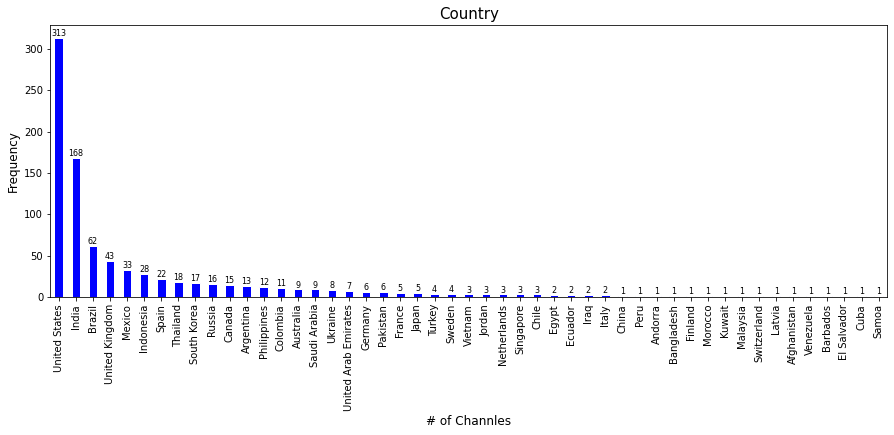

In [53]:
plot_bar(df['country'], 'Country', '# of Channles')

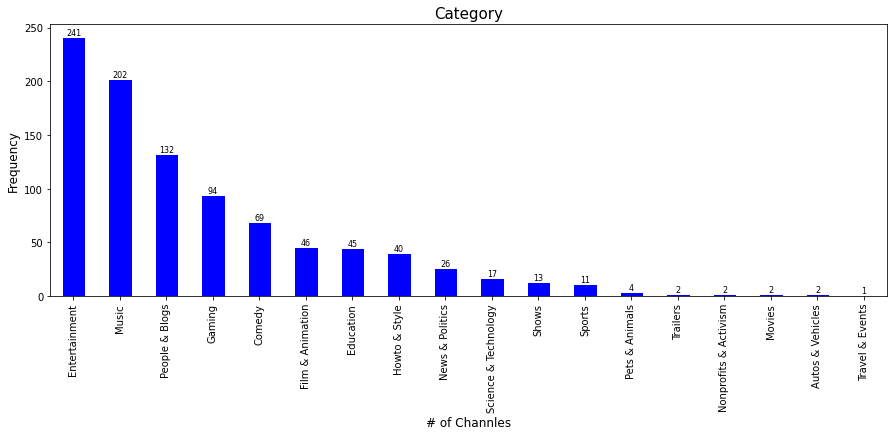

In [54]:
plot_bar(df['category'], 'Category', '# of Channles')

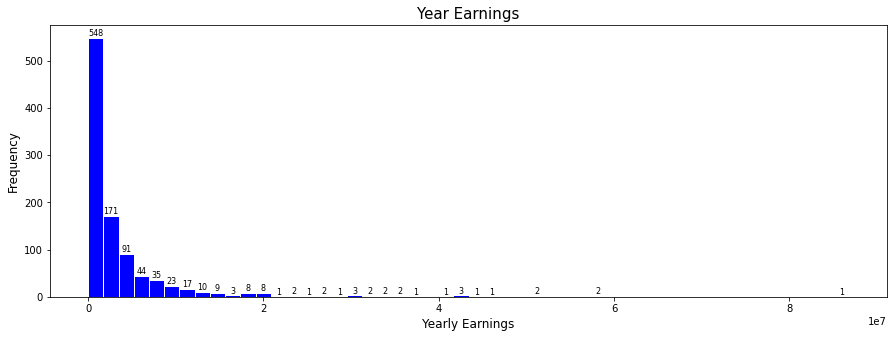

In [59]:
plot_hist(df['average_annual_earnings'], bins=50, title='Year Earnings', xlabel='Yearly Earnings')

In [60]:
df.dtypes

rank                                  int64
youtuber                             object
subscribers                           int64
video_views                         float64
category                             object
title                                object
uploads                               int64
country                              object
abbreviation                         object
channel_type                         object
video_views_rank                    float64
country_rank                        float64
channel_type_rank                   float64
video_views_for_the_last_30_days    float64
lowest_monthly_earnings             float64
highest_monthly_earnings            float64
lowest_yearly_earnings              float64
highest_yearly_earnings             float64
subscribers_for_last_30_days        float64
created_year                          int64
created_month                        object
created_day                           int64
latitude                        